In [1]:
from main_cnn import main
import argparse
import numpy as np

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--config', help='Path to the config file', default='./default_config.yml')
parser.add_argument('--log-dir', help='Path to the log directory', default='../log/')
parser.add_argument('--posters', help='Path to the posters', default='../data/posters/')
parser.add_argument('--models-dir', help='Path to the saved models', default='../data/models/')
parser.add_argument('--sets-dir', help='Path to the training and testing sets', default='../data/sets/')
parser.add_argument('--database', help='Path to the databse csv', default='../data/poster_data.csv')
parser.add_argument('--csv', help='Path to the clean csv', default='../data/')
parser.add_argument('-s', '--save', help='Save model', action='store_true')
parser.add_argument('-v', '--verbose', help='Verbose', action='store_true')

str_args = '-v -s'.split()
args, _ = parser.parse_known_args(str_args)

In [3]:
movies, model, train_posters, train_genres, train_ids, test_posters, test_genres, test_ids, clean_movies, predicted_genres, training_history = main(args)

Database already cleaned


  6%|▌         | 706/11935 [00:00<00:01, 7059.20it/s]

Posters database downloading


 91%|█████████ | 10848/11935 [00:01<00:00, 5735.17it/s]

Error HTTP Error 404: Not Found with film 9532


100%|██████████| 11935/11935 [00:01<00:00, 6704.97it/s]


Database downloaded
Training and testing sets alreadey made
Train on 3540 samples, validate on 625 samples
Epoch 1/5
3540/3540 [==============================] - 74s 21ms/sample - loss: 2.1239 - accuracy: 0.1672 - val_loss: 2.6104 - val_accuracy: 0.1808
Epoch 2/5
3540/3540 [==============================] - 65s 18ms/sample - loss: 2.0158 - accuracy: 0.2028 - val_loss: 2.6337 - val_accuracy: 0.1744
Epoch 3/5
3540/3540 [==============================] - 65s 18ms/sample - loss: 1.9664 - accuracy: 0.2212 - val_loss: 2.5525 - val_accuracy: 0.1920
Epoch 4/5
3540/3540 [==============================] - 66s 19ms/sample - loss: 1.9246 - accuracy: 0.2277 - val_loss: 2.5049 - val_accuracy: 0.2016
Epoch 5/5
3540/3540 [==============================] - 65s 18ms/sample - loss: 1.9083 - accuracy: 0.2458 - val_loss: 2.5143 - val_accuracy: 0.2000
0.17959183673469387


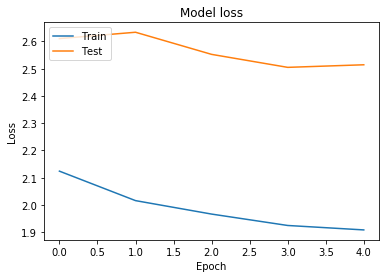

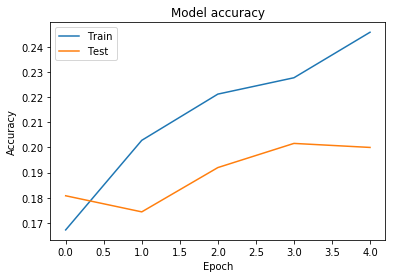

In [4]:
from utils.display.training_display import plot_loss, plot_accuracy
%matplotlib inline

if training_history is not None:
    plot_loss(training_history)
    plot_accuracy(training_history)

In [5]:
import yaml

config = yaml.safe_load(open(args.config))
genres_inv = {config['genres'][k]: k for k in config['genres'].keys()}
print(genres_inv)

{0: 'Action', 1: 'Animation', 2: 'Comédie', 3: 'Comédie dramatique', 4: 'Documentaire', 5: 'Drame', 6: 'Thriller-Policier'}


In [6]:
# FOR MULTI LABEL
# import numpy as np

# predictions = [] 
# for pred in predicted_genres:
#     first3_index = np.argsort(pred)[-3:]
#     predictions.append([genres_inv[k] for k in first3_index])
# ground_truth = []
# for truth in test_genres:
#     first3_index = np.nonzero(truth)[0]
#     ground_truth.append([genres_inv[k] for k in first3_index])

predictions = np.array([genres_inv[k] for k in np.argmax(predicted_genres, axis=1)])
ground_truth = np.array([genres_inv[k] for k in np.argmax(test_genres, axis=1)])

In [7]:
movies.set_index('allocine_id', inplace=True)

In [8]:
r = np.random.permutation(100)[:10]
for i in r:
    print('{}: truth: {}, pred: {}'.format(movies.loc[test_ids[i], 'title'], ground_truth[i], predictions[i]))
#     print('Ground truth: {}, real: {}'.format(ground_truth[i], movies.loc[test_ids[i], 'genres']))

Le Bois dont les rêves sont faits: truth: Documentaire, pred: Documentaire
La Stratégie Ender: truth: Action, pred: Comédie dramatique
Koyaanisqatsi, la prophétie: truth: Documentaire, pred: Drame
Le Choc des générations: truth: Comédie, pred: Comédie dramatique
Point Break: truth: Action, pred: Comédie dramatique
Piège en haute mer: truth: Action, pred: Comédie dramatique
Semi-Pro: truth: Comédie, pred: Comédie dramatique
Un baiser papillon: truth: Comédie dramatique, pred: Comédie dramatique
Max Payne: truth: Action, pred: Comédie dramatique
Toxic affair: truth: Comédie dramatique, pred: Comédie dramatique


In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

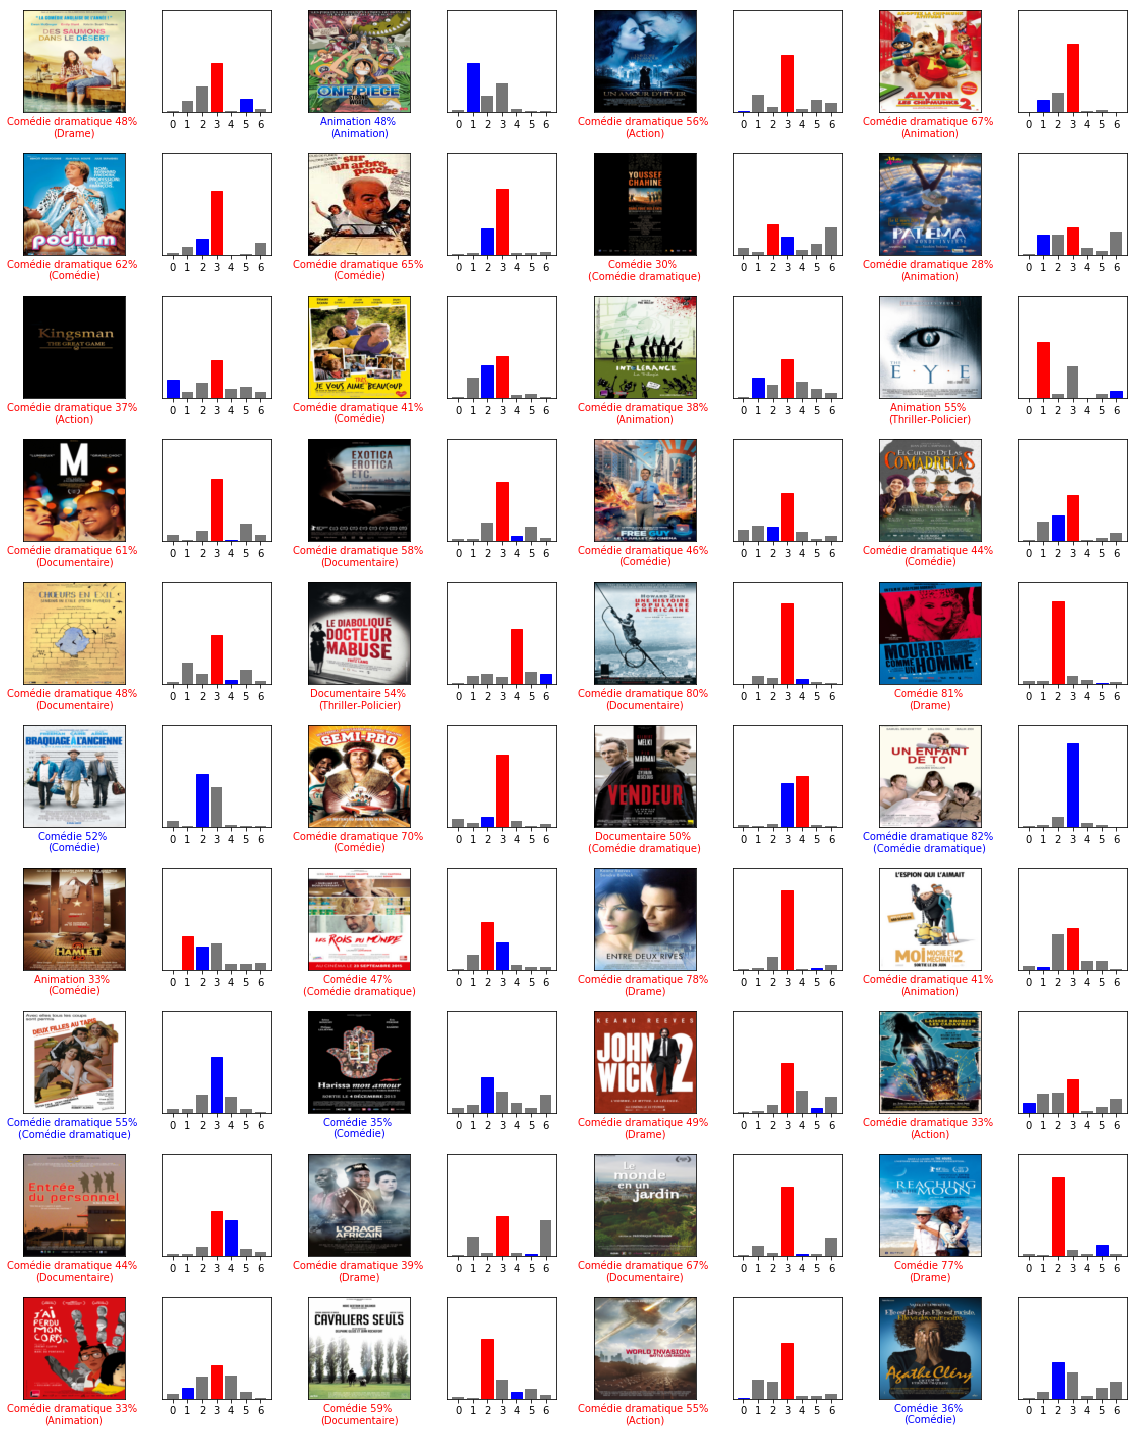

In [10]:
from utils.display.results_display import plot_test_results

starting_index = 0
num_row, num_cols = 10, 4
plot_test_results(test_posters, test_genres, genres_inv, predicted_genres, starting_index, num_row, num_cols)